**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../run_config_project_sing.R")))
show_env()

You are working on        Singularity 
BASE DIRECTORY (FD_BASE): /mount 
REPO DIRECTORY (FD_REPO): /mount/repo 
WORK DIRECTORY (FD_WORK): /mount/work 
DATA DIRECTORY (FD_DATA): /mount/data 

You are working with      ENCODE FCC 
PATH OF PROJECT (FD_PRJ): /mount/repo/Proj_ENCODE_FCC 
PROJECT RESULTS (FD_RES): /mount/repo/Proj_ENCODE_FCC/results 
PROJECT SCRIPTS (FD_EXE): /mount/repo/Proj_ENCODE_FCC/scripts 
PROJECT DATA    (FD_DAT): /mount/repo/Proj_ENCODE_FCC/data 
PROJECT NOTE    (FD_NBK): /mount/repo/Proj_ENCODE_FCC/notebooks 
PROJECT DOCS    (FD_DOC): /mount/repo/Proj_ENCODE_FCC/docs 
PROJECT LOG     (FD_LOG): /mount/repo/Proj_ENCODE_FCC/log 
PROJECT APP     (FD_APP): /mount/repo/Proj_ENCODE_FCC/app 
PROJECT REF     (FD_REF): /mount/repo/Proj_ENCODE_FCC/references 



**Set global variables**

In [2]:
TXT_FOLDER_REGION = "hic_insitu_K562_ENCSR545YBD"

## Import data

In [3]:
txt_folder = TXT_FOLDER_REGION
txt_fdiry  = file.path(FD_RES, "region", txt_folder)

vec = dir(txt_fdiry)
for (txt in vec){cat(txt, "\n")}

K562.hg38.hic_insitu.Loop_A.bed.gz 
K562.hg38.hic_insitu.Loop_B.bed.gz 
K562.hg38.hic_insitu.TAD.bedpe.gz 
summary 


In [4]:
txt_folder = TXT_FOLDER_REGION
txt_fdiry  = file.path(FD_RES, "region", txt_folder, "summary")

vec = dir(txt_fdiry)
for (txt in vec){cat(txt, "\n")}

description.tsv 
K562.hg38.hic_insitu.Loop.tsv 
K562.hg38.hic_insitu.TAD.tsv 
metadata.label.tsv 


In [5]:
### set file path
txt_folder = TXT_FOLDER_REGION
txt_fdiry  = file.path(FD_RES, "region", txt_folder, "summary")
txt_fname = "description.tsv"
txt_fpath = file.path(txt_fdiry, txt_fname)

### read table
dat = read_tsv(txt_fpath, show_col_types = FALSE)

### assign and show
dat_cname     = dat
vec_txt_cname = dat$Name
fun_display_table(head(dat))

Name,Note
Chrom,Name of the chromosome
ChromStart,The starting position of the feature in the chromosome
ChromEnd,The ending position of the feature in the chromosome
Name,Name given to a region; Use '.' if no name is assigned.
Group,Assay Name
Label,Region Label


In [7]:
### set file path
txt_folder = TXT_FOLDER_REGION
txt_fdiry  = file.path(FD_RES, "region", txt_folder, "summary")
txt_fname = "K562.hg38.hic_insitu.Loop.tsv"
txt_fpath = file.path(txt_fdiry, txt_fname)

### read table
dat = read_tsv(txt_fpath, show_col_types = FALSE)

### assign and show
dat_region_loop = dat
fun_display_table(head(dat))

Chrom_A,ChromStart_A,ChromEnd_A,Region_A,Length_A,Chrom_B,ChromStart_B,ChromEnd_B,Region_B,Length_B,Name,Observed,Centroid_A,Centroid_B,Radius,Distance,Size
chr1,230000,235000,chr1:230000-235000,5000,chr1,825000,830000,chr1:825000-830000,5000,chr1:230000-235000|chr1:825000-830000,15,232500,825000,2500,592500,5000
chr1,315000,320000,chr1:315000-320000,5000,chr1,840000,845000,chr1:840000-845000,5000,chr1:315000-320000|chr1:840000-845000,18,317500,842500,14142,525000,5000
chr1,375000,380000,chr1:375000-380000,5000,chr1,820000,825000,chr1:820000-825000,5000,chr1:375000-380000|chr1:820000-825000,20,375000,822500,2500,447500,5000
chr1,600000,625000,chr1:6e+05-625000,25000,chr1,223875000,223900000,chr1:223875000-223900000,25000,chr1:6e+05-625000|chr1:223875000-223900000,17,612500,223887500,0,223275000,25000
chr1,775000,780000,chr1:775000-780000,5000,chr1,820000,825000,chr1:820000-825000,5000,chr1:775000-780000|chr1:820000-825000,50,777500,822500,0,45000,5000
chr1,775000,780000,chr1:775000-780000,5000,chr1,223990000,223995000,chr1:223990000-223995000,5000,chr1:775000-780000|chr1:223990000-223995000,40,777500,223992500,0,223215000,5000


## Explore

In [8]:
dat = dat_region_loop
summary(dat$Distance)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
    35000    162500    390000   6364448   1235000 241300000 

In [9]:
dat = dat_region_loop
table(dat$Size)


 5000 10000 25000 
 6162  4164  3295 

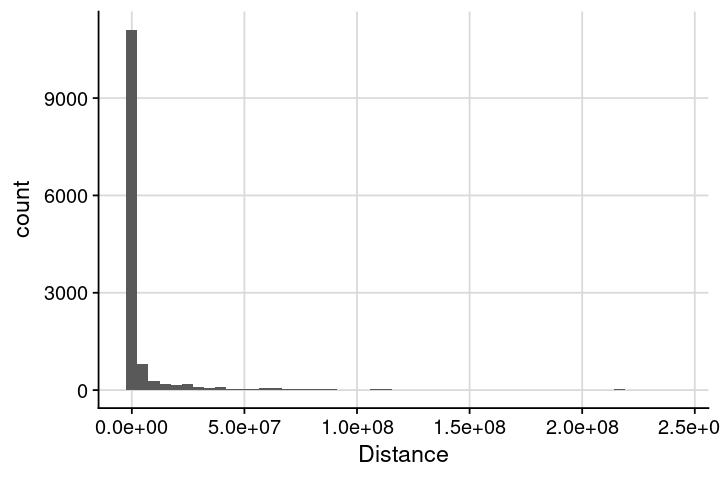

In [10]:
dat = dat_region_loop
gpt = ggplot(dat, aes(x=Distance)) + 
    geom_histogram(bins=50) +
    theme_cowplot() +
    background_grid()

options(repr.plot.height=4, repr.plot.width=6)
print(gpt)

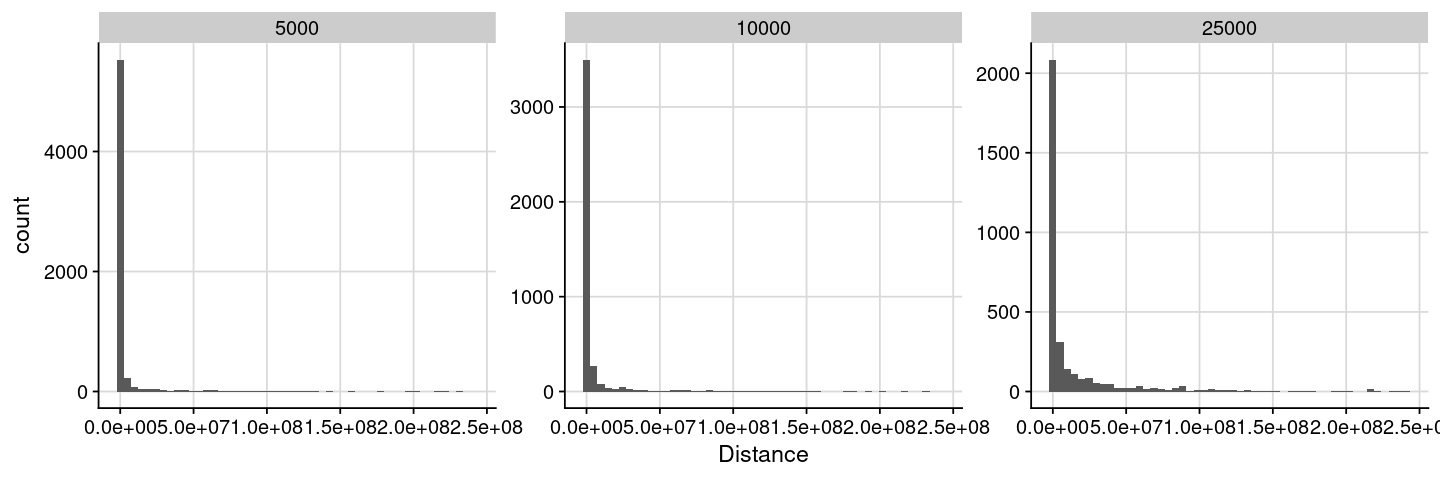

In [12]:
dat = dat_region_loop

gpt = ggplot(dat, aes(x=Distance)) + 
    geom_histogram(bins=50) +
    theme_cowplot() +
    background_grid() +
    facet_wrap(~Size, scale = "free_y")

options(repr.plot.height=4, repr.plot.width=12)
print(gpt)